## Tutorial Setup

### Check your install

In [55]:
import numpy

In [56]:
import scipy

In [57]:
import matplotlib

In [58]:
import sklearn

In [59]:
import psutil

In [60]:
import pandas

In [61]:
import IPython.parallel

/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


Finding the location of an installed package and its version:

In [62]:
numpy.__path__

['/usr/local/lib/python2.7/dist-packages/numpy']

In [63]:
numpy.__version__

'1.10.1'

### Check that you have the datasets

In [64]:
%run ../fetch_data.py

Using existing dataset folder:/home/janus/21_perspective/github/21v-python/unit_20/parallel_ml_tutorial-master/datasets
Checking availability of the 20 newsgroups dataset
Found archive: /home/janus/21_perspective/github/21v-python/unit_20/parallel_ml_tutorial-master/datasets/20news-bydate.tar.gz
Checking that the 20 newsgroups files exist...
=> Success!


In [1]:
import os
for fname in os.listdir('../datasets/'):
    print(fname)

20news-bydate.tar.gz
20news-bydate-train
20news-bydate-test


## A NumPy primer

### NumPy array dtypes and shapes

In [2]:
import numpy as np

In [3]:
a = np.array([1, 2, 3])

In [4]:
a

array([1, 2, 3])

In [5]:
b = np.array([[0, 2, 4], [1, 3, 5]])

In [6]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [7]:
b.shape

(2, 3)

In [8]:
b.dtype

dtype('int64')

In [9]:
a.shape

(3,)

In [10]:
a.dtype

dtype('int64')

In [11]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [12]:
np.ones(shape=(3, 4), dtype=np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

### Common array operations

In [13]:
c = b * 0.5

In [14]:
c

array([[ 0. ,  1. ,  2. ],
       [ 0.5,  1.5,  2.5]])

In [15]:
c.shape

(2, 3)

In [16]:
c.dtype

dtype('float64')

In [17]:
a

array([1, 2, 3])

In [18]:
d = a + c

In [19]:
d

array([[ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [20]:
d[0]

array([ 1.,  3.,  5.])

In [21]:
d[0, 0]

1.0

In [22]:
d[:, 0]

array([ 1. ,  1.5])

In [23]:
d.sum()

19.5

In [24]:
d.mean()

3.25

In [25]:
d.sum(axis=0)

array([  2.5,   6.5,  10.5])

In [26]:
d.mean(axis=1)

array([ 3. ,  3.5])

### Reshaping and inplace update

In [27]:
e = np.arange(12)

In [28]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
f = e.reshape(3, 4)

In [30]:
f

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [32]:
e[5:] = 0

In [33]:
e

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0])

In [34]:
f

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

### Combining arrays

In [35]:
a

array([1, 2, 3])

In [36]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [37]:
d

array([[ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [38]:
np.concatenate([a, a, a])

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [39]:
np.vstack([a, b, d])

array([[ 1. ,  2. ,  3. ],
       [ 0. ,  2. ,  4. ],
       [ 1. ,  3. ,  5. ],
       [ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [40]:
np.hstack([b, d])

array([[ 0. ,  2. ,  4. ,  1. ,  3. ,  5. ],
       [ 1. ,  3. ,  5. ,  1.5,  3.5,  5.5]])

## A Matplotlib primer

In [41]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt

In [43]:
x = np.linspace(0, 2, 10)

In [44]:
x

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

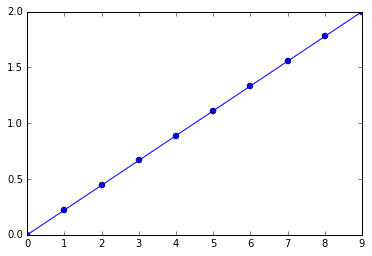

In [45]:
plt.plot(x, 'o-');

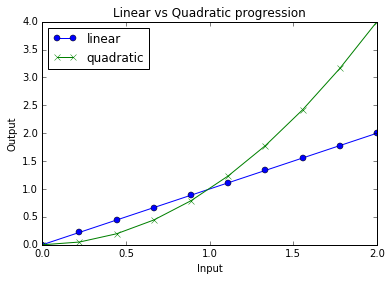

In [46]:
plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

In [47]:
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

In [48]:
samples.shape

(1000,)

In [49]:
samples.dtype

dtype('float64')

In [50]:
samples[:30]

array([ 0.9723313 ,  1.05145447,  0.31986674, -0.26642655,  1.79545186,
        0.89663891, -0.78769912,  0.67095478,  1.28211239,  0.66237962,
        1.12488518,  1.76541164,  0.69160337,  0.05183348,  0.64934675,
        1.38717818,  0.37051531,  0.52509259,  1.17117495,  1.8224232 ,
        0.97875658,  1.60924242,  1.09170888,  0.40106831,  1.06174804,
        0.54542997,  1.21400516,  1.11310423, -0.1808943 , -0.36915236])

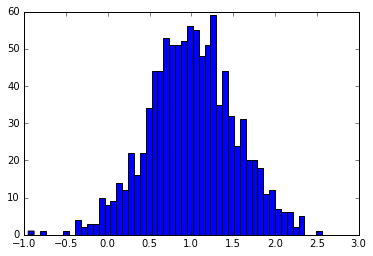

In [51]:
plt.hist(samples, bins=50);

In [52]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000)
samples_2 = np.random.standard_t(df=10, size=10000)

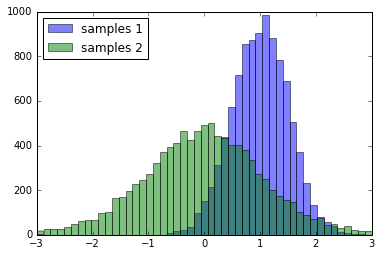

In [53]:
bins = np.linspace(-3, 3, 50)
_ = plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1')
_ = plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left');

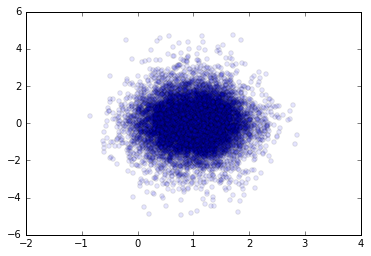

In [54]:
plt.scatter(samples_1, samples_2, alpha=0.1);